In [59]:
library(tidyverse)
library(clusterProfiler)
library(WGCNA)
library(parallel)
library(pheatmap)
library(RColorBrewer)
library(grid)

# Custom package
library(rutils)

In [60]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

event_code <- list("Alive" = 0, "Dead" = 1)

In [61]:
dset_idx <- 3

In [62]:
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_data.RData"))
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_network.RData"))

In [63]:
module_annot <- tibble(module_colors) %>%
    mutate(geneID = colnames(data_expr)) %>%
    column_to_rownames("geneID")

module_annot_colors <- list("module_colors" = unique(module_colors))
names(module_annot_colors[["module_colors"]]) <- unique(module_colors)

break_list <- seq(0, 0.3, by = 0.005)
pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
# pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(length(break_list))

hm_breaks = c(0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3)
hm_labels = c("0", "0.05", "0.1", "0.15", "0.2", "0.25", ">0.3")

In [64]:
tom_hm <- tom - diag(1, nrow(tom), nrow(tom))
rownames(tom_hm) <- colnames(data_expr)
colnames(tom_hm) <- colnames(data_expr)

Saving 6.67 x 6.67 in image



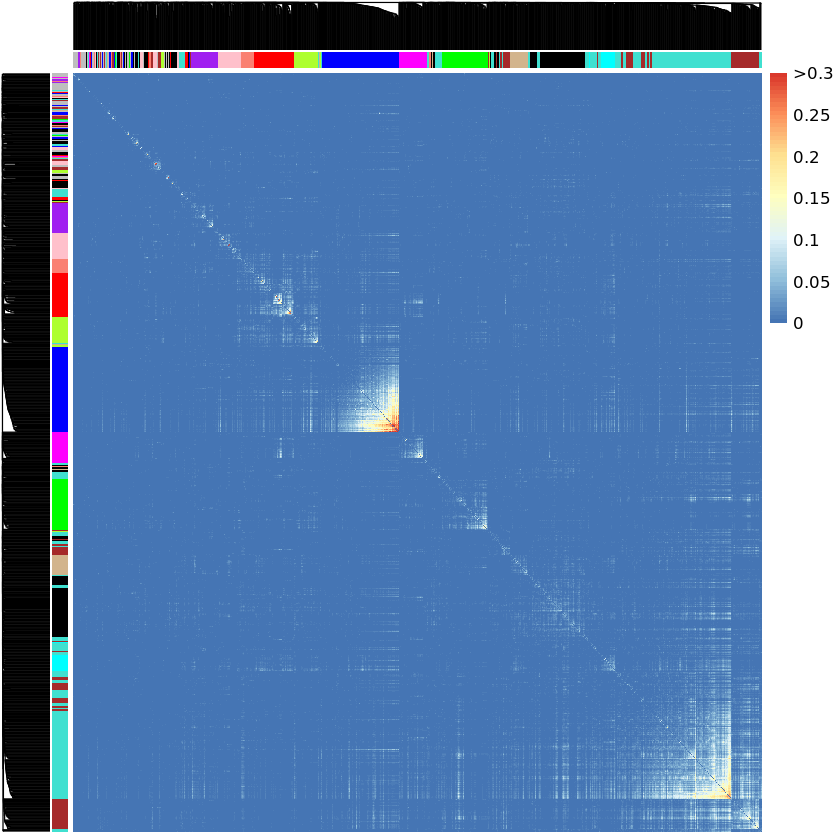

In [65]:
hm <- pheatmap(
    tom_hm,
    cluster_rows = gene_tree,
    cluster_cols = gene_tree,
    show_rownames = FALSE,
    show_colnames = FALSE,
    annotation_row = module_annot,
    annotation_names_row = FALSE,
    annotation_col = module_annot,
    annotation_colors = module_annot_colors,
    annotation_names_col = FALSE,
    annotation_legend = FALSE,
    color = pal,
    breaks = break_list,
    legend_breaks = hm_breaks,
    legend_labels = hm_labels,
    treeheight_row = 25,
    treeheight_col = 25,
)
hm$gtable$grobs[[1]]$gp <- gpar(lwd = 0.5)
hm$gtable$grobs[[2]]$gp <- gpar(lwd = 0.5)
# hm
ggsave(paste0(dirs$figures_dir, "/network/", unified_dsets[dset_idx], "_TOM_heatmap.png"), hm)


In [66]:
# TOMplot(
#     tom - diag(1, nrow(tom), nrow(tom)),
#     gene_tree,
#     module_colors,
#     main = "Network heatmap plot, all genes"
# )